In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
#Veri işleme,veri görselleştirme ve kümeleme için gerekli kütüphaneleri içe aktar

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
#Veri setini projeye aktarssss(kendi dosya yoluna göre düzenle)

In [5]:
df.head()
#Veri setinin ilk 5 satırı

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop("CustomerID", axis=1, inplace=True)
#K-Means algoritması için anlam ifade etmeyen CustomerID sütununu çıkart

In [9]:
print(df.info())
#Veri setinin sütun adlarnı,veri tipini ve boş karakter olup olmadığını kontrol et

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [11]:
print(df.describe())
#Veri setinin istatisliksel özeti

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


C:\Users\Nisa\AppData\Local\Temp\ipykernel_96008\2783053326.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette={"Female": "pink", "Male": "skyblue"})


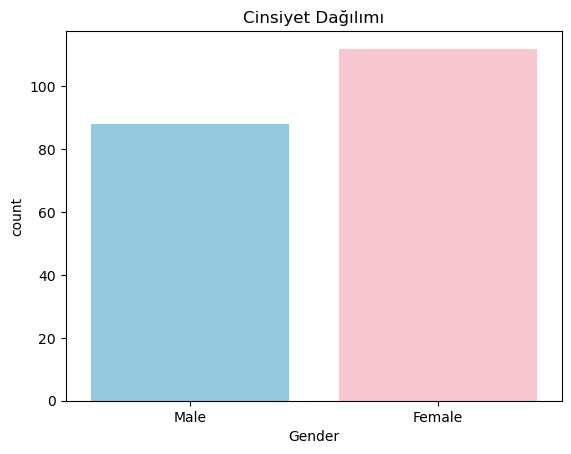

In [13]:
#Cinsiyet dağılımı verisine göre bar grafiği çiz
sns.countplot(x="Gender", data=df)

#Grafiğin başlığını oluştur
plt.title("Cinsiyet Dağılımı")

#Grafiğin renklerini özelleştir
sns.countplot(x="Gender", data=df, palette={"Female": "pink", "Male": "skyblue"})

#Grafiği ekranda göster
plt.show()

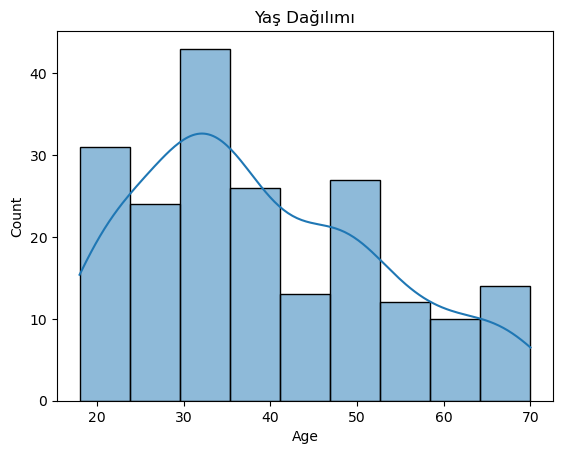

In [15]:
# Yaş verisinin histogramını ve yoğunluk eğrisini çiz
sns.histplot(df["Age"], kde=True)

# Grafiğe başlık ekle
plt.title("Yaş Dağılımı")

# Grafiği ekranda göster
plt.show()

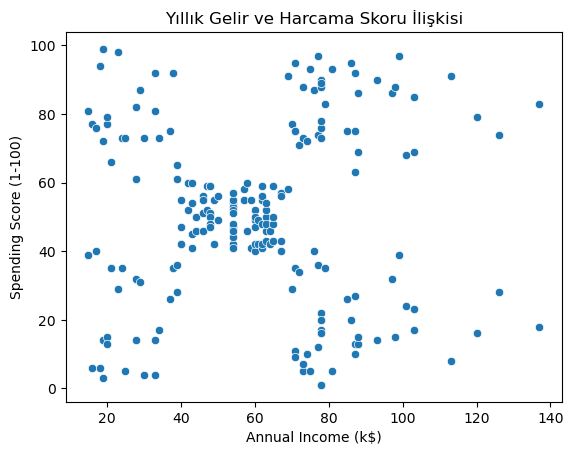

In [17]:
# Müşterilerin yıllık gelir ve harcama skorlarına göre dağılımını çiz
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

# Grafiğe başlık ekle
plt.title("Yıllık Gelir ve Harcama Skoru İlişkisi")

# Grafiği ekranda göster
plt.show()

In [19]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
#K-Means alogritmasında girdi olarak kullanılacak x değişkenine Annual Income (k$) ve Spending Score (1-100) sütunlarını ata

C:\Users\Nisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

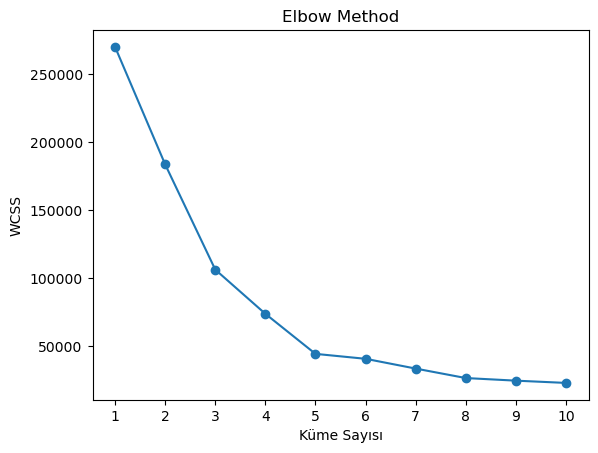

In [21]:
# WCSS (within-cluster sum of squares) değerlerini tutmak için boş liste oluştur
wcss = []

# 1'den 10'a kadar farklı küme sayıları için K-Means uygula
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)  # Küme sayısı i olan model tanımla
    km.fit(X)                                   # Model veriye uygula
    wcss.append(km.inertia_)                    # Her küme sayısı için WCSS değeri listeye ekle

# Elbow grafiği çiziliyor
plt.plot(range(1, 11), wcss, marker='o')        # Noktalarla birlikte çizgi grafik
plt.title("Elbow Method")                       # Grafik başlığı
plt.xlabel("Küme Sayısı")                       # X ekseni etiketi
plt.ylabel("WCSS")                              # Y ekseni etiketi
plt.xticks(np.arange(1, 11, 1))                 # X ekseninde 1'den 10'a kadar işaretleme
plt.show()                                      # Grafiği ekranda göster

In [48]:
# 5 küme olacak şekilde sabit ratgelelik ile K-Means modelini tanımla
kmeans = KMeans(n_clusters=5, random_state=42)

# Modeli eğit ve her gözlemi bir kümeye atayarak sonuçları 'Cluster' sütunu olarak veri setine ekle
df["Cluster"] = kmeans.fit_predict(X)

# Veri setinin ilk 5 satırını görüntüle
df.head()

C:\Users\Nisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


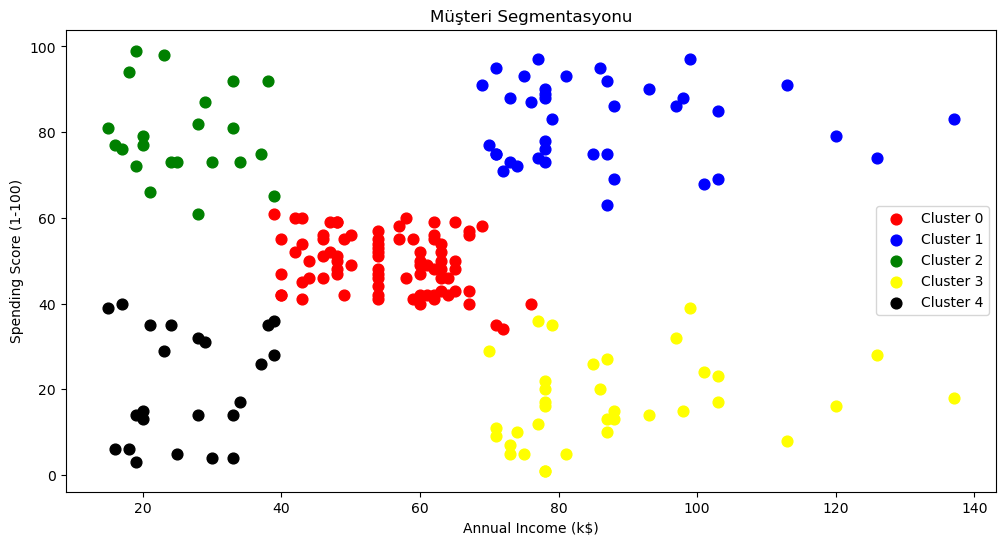

In [63]:
# Grafik boyutunu belirle (genişlik x yükseklik)
plt.figure(figsize=(12, 6))  

# Her küme için bir renk tanımla
colors = ['red', 'blue', 'green', 'yellow', 'black']

# 5 kümeyi çiz
for i in range(5):
    plt.scatter(
        X[df.Cluster == i]["Annual Income (k$)"],        # X ekseni: yıllık gelir
        X[df.Cluster == i]["Spending Score (1-100)"],    # Y ekseni: harcama skoru
        s=60,                                            # Nokta boyutu
        c=colors[i],                                     # Kümenin rengi
        label=f'Cluster {i}'                             # Legend etiketi
    )

# Eksen adları ve grafik başlığı ekle
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Müşteri Segmentasyonu")

# Küme etiketlerini gösteren lejant  ekle
plt.legend()

# Grafiği ekranda göster
plt.show()